In [ ]:
import pandas as pd  #importacion de librerias
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
from scipy import stats as st

In [2]:
tab_1 = pd.read_csv ('/datasets/project_sql_result_01.csv') 
tab_2 = pd.read_csv ('/datasets/project_sql_result_04.csv')
tab_3 = pd.read_csv ('/datasets/project_sql_result_07.csv')

In [3]:
tab_1.info()
tab_1.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


<bound method NDFrame.head of                        company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]>

In [4]:
tab_2.info()
tab_2.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


<bound method NDFrame.head of    dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]>

In [5]:
tab_3.info()
tab_3 = tab_3[tab_3['duration_seconds'] > 0]
tab_3.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


<bound method NDFrame.head of                  start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1062  2017-11-11 06:00:00               Good            1500.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1062 rows x 3 columns]>

In [6]:
top_barrios = tab_2.sort_values(by='average_trips', ascending=False).head(10)
print(top_barrios)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


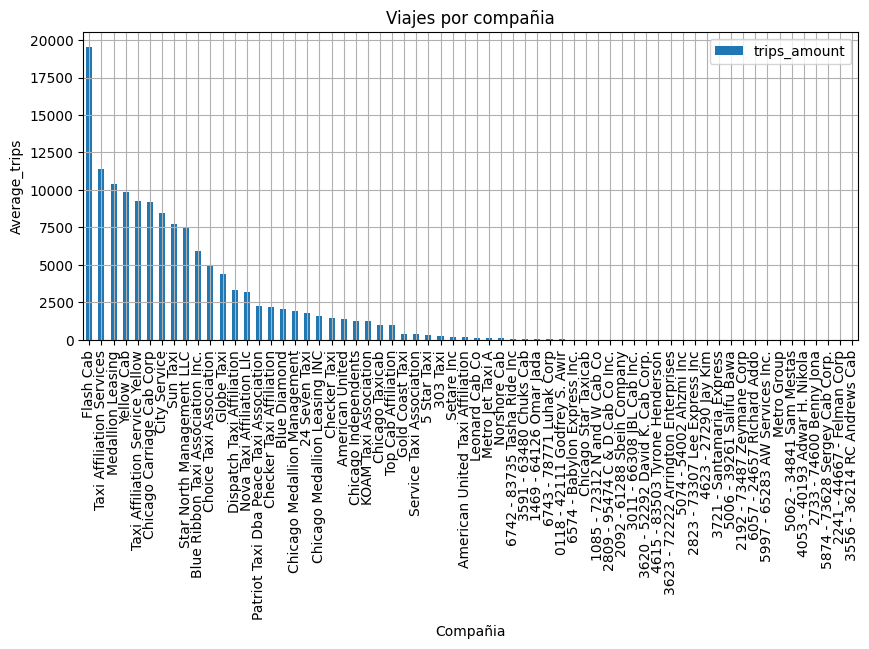

In [7]:
tab_1.plot(title='Viajes por compañia',
          xlabel="Compañia",
          x = 'company_name', 
          ylabel="Average_trips",
          figsize=[10,4],
          grid= True,
          kind="bar")
plt.show()

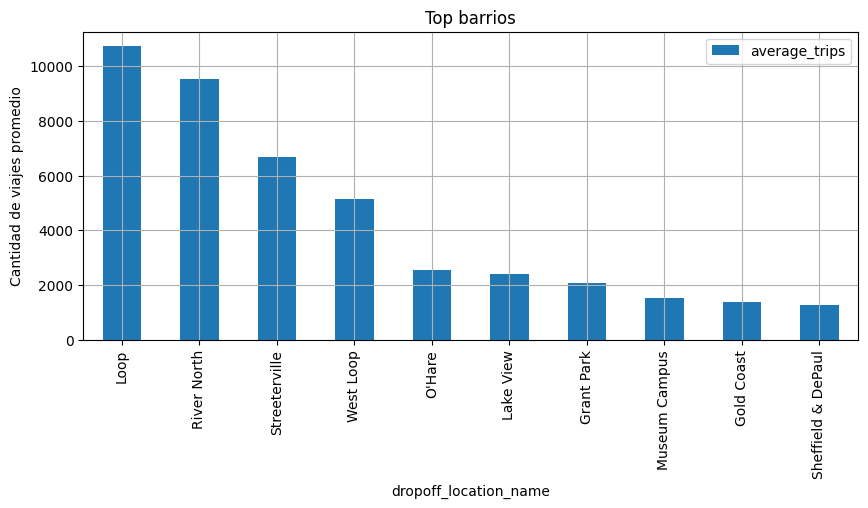

In [8]:
top_barrios.plot(title='Top barrios',
          xlabel="dropoff_location_name",
          x = 'dropoff_location_name', 
          ylabel="Cantidad de viajes promedio",
          figsize=[10,4],
          grid= True,
          kind="bar")
plt.show()

Basado en los graficos podemos observar que las compañias con mayor cantidad de viajes son: 
1.- Flash Cab
2.- Taxi affiliation Service 
3.- Medallion Leasing

Ademas de que los top barrios destino son:
1.- Loop
2.- River North
3.- Streeterville

Prueba de hipótesis:

Hipotesis nula: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Hipotesis alternativa: "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos".

In [9]:
bad_clima = tab_3[
    (tab_3['weather_conditions'] == "Bad")
]
bad_clima = bad_clima["duration_seconds"]
print(bad_clima)

6       2969.0
30      1980.0
34      2460.0
51      2760.0
52      2460.0
         ...  
1031    2560.0
1032    1908.0
1053    2400.0
1061    2186.0
1067    2834.0
Name: duration_seconds, Length: 180, dtype: float64


In [10]:
good_clima =tab_3[
    (tab_3['weather_conditions']=="Good")]
good_clima = good_clima["duration_seconds"]
print(good_clima)

0       2410.0
1       1920.0
2       1543.0
3       2512.0
4       1440.0
         ...  
1060    2700.0
1062    1500.0
1064    1318.0
1065    2100.0
1066    1380.0
Name: duration_seconds, Length: 882, dtype: float64


In [11]:
alpha = 0.05
statistic,p_value = stats.levene(bad_clima, good_clima) #valor levene para identificar si las varianzas son iguales


print("Levene p-value:", p_value)

if (p_value<alpha):# compara los valores p de Levene obtenidos con el nivel de significación estadística
    val=False
else:
    val=True


results = st.ttest_ind(bad_clima,good_clima, equal_var=val)
print('valor p:', results.pvalue)# imprime el valor p obtenido)

if (results.pvalue<alpha):# compara los valores p obtenidos con el nivel de significación estadística
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Levene p-value: 0.6687312920630069
valor p: 1.3318772977743245e-11
Rechazamos la hipótesis nula


Para probar la hipotesis utilizamos la duracion del viaje tanto en clima malo como en clima bueno, 
utilzando los valores estadisticos podemos rechazar la hipotesis nula.